In [1]:
import re
import base64
import pandas as pd
import json
from io import BytesIO
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import files


print("Please upload your log file:")
uploaded = files.upload()
log_file_name = list(uploaded.keys())[0]


Please upload your log file:


Saving assignment_prod (1).log to assignment_prod (1).log


In [3]:
parsed_data = []
errors = []


In [4]:
def decode_base64_image(base64_string, save_path=None):
    try:
        image_data = base64.b64decode(base64_string)
        image = Image.open(BytesIO(image_data))
        if save_path:
            image.save(save_path)
        return image
    except Exception as e:
        errors.append(f"Error decoding Base64 image: {e}")
        return None


In [5]:
with open(log_file_name, 'r') as file:
    log_contents = file.readlines()


In [6]:
for line in log_contents:
    line = line.strip()
    try:
        if line.startswith("BASE64:"):
            base64_data = line.split("BASE64:")[1]
            decoded_image = decode_base64_image(base64_data)
            if decoded_image:
                parsed_data.append({"type": "image", "content": "Base64 Image Decoded"})
        elif line.startswith("{") and line.endswith("}"):
            json_data = json.loads(line)
            parsed_data.append({"type": "json", "content": json_data})


        else:
            kv_pairs = re.findall(r'(\w+)=([\w\.\-:]+)', line)
            if kv_pairs:
                parsed_data.append({"type": "key_value", "content": dict(kv_pairs)})
            else:
                errors.append(f"Unrecognized format: {line}")

    except Exception as e:
        errors.append(f"Error parsing line: {line} - {e}")


In [7]:
structured_data = pd.DataFrame([entry['content'] for entry in parsed_data if entry['type'] == "key_value"])



In [8]:
with open("error_log.txt", "w") as error_file:
    for error in errors:
        error_file.write(error + "\n")


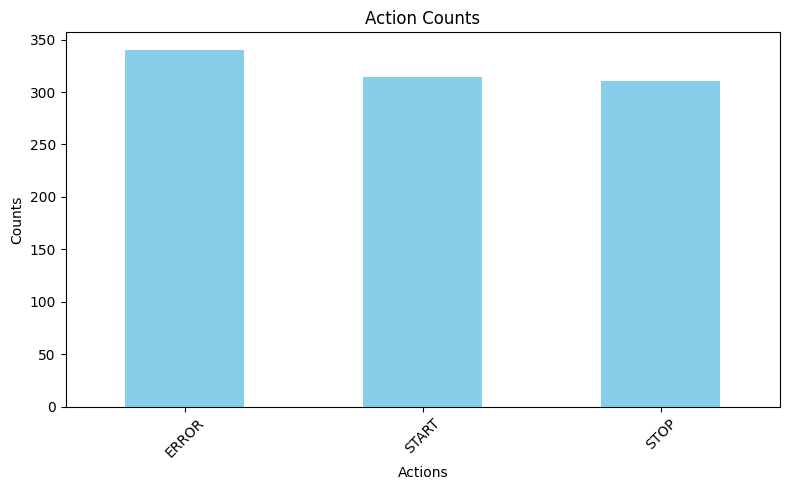

In [9]:

if "action" in structured_data.columns:
    action_counts = structured_data["action"].value_counts()
    plt.figure(figsize=(8, 5))
    action_counts.plot(kind='bar', color='skyblue')
    plt.title("Action Counts")
    plt.xlabel("Actions")
    plt.ylabel("Counts")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [10]:
structured_data.to_csv("structured_data.csv", index=False)
print("Parsing complete! Download your error log and structured data:")
files.download("error_log.txt")
files.download("structured_data.csv")

Parsing complete! Download your error log and structured data:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>